# Color calibration notebook

The goal of this notebook is to calibrate the color segmentation parameters required for robust detection of colored gloves in a controlled environment.The aim is to obtain suitable lower and upper bounds for each glove color.

These calibrated parameters will be used in the main system for reliable color-based segmentation, which is a key step prior to tracking and gesture (rock–paper–scissors) recognition in the final computer vision application

In [1]:
import sys
from pathlib import Path
import cv2
import os
import glob
import json
import numpy as np

In [3]:
# Add project root to PYTHONPATH
project_root = Path().resolve().parents[0]
sys.path.append(str(project_root))


In [ ]:
from utils.utils import get_hsv_color_ranges, load_images, show_images_h, get_mask

The calibration parameters will be stored in a configuration file, define here the name

In [ ]:
CONFIG_NAME = 'test_set_2.json'   # change configuration here
CONFIG_FOLDER = '../configs'
os.makedirs(CONFIG_FOLDER, exist_ok = True)
CONFIG_PATH = os.path.join(CONFIG_FOLDER, CONFIG_NAME)

Take pictures of the globes, they should be located in the `hands` folder

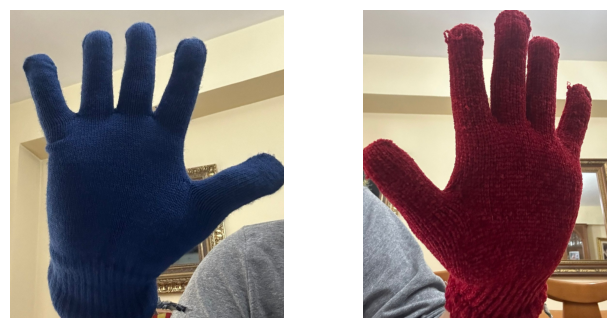

In [ ]:
HANDS_PATH = 'test_hands_2/*.jpeg'   # change path here
BASE_HAND = 'hands'
hands_path = sorted(glob.glob(os.path.join(BASE_HAND, HANDS_PATH)))
hands = load_images(hands_path)

show_images_h(hands)

Obtain the lower and upper bounds for the <span style="color:blue">blue</span> color.

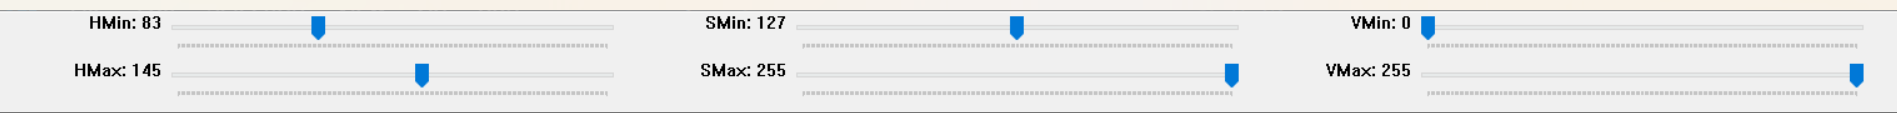

In [ ]:
get_hsv_color_ranges(hands[0])

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 3 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 17 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 38 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 52 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 62 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 70 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 74 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 83 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 87 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 88 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 91 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 100 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 109 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax

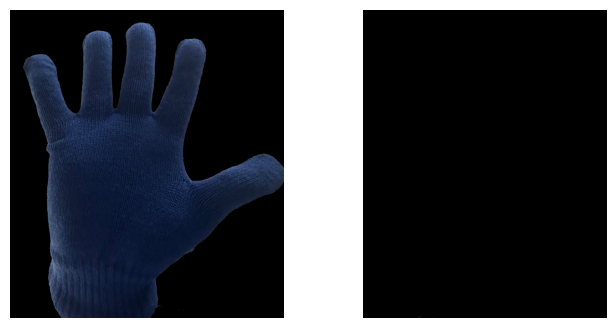

In [ ]:

lower_blue = (88, 64, 7)
upper_blue = (133, 255, 193)
blue_ranges = (lower_blue, upper_blue)

# Check the mask applied to all images
blue_masked = get_mask(hands, lower_blue, upper_blue)
show_images_h(blue_masked)


Obtain the lower and upper bounds for the <span style="color:red">red</span> color.

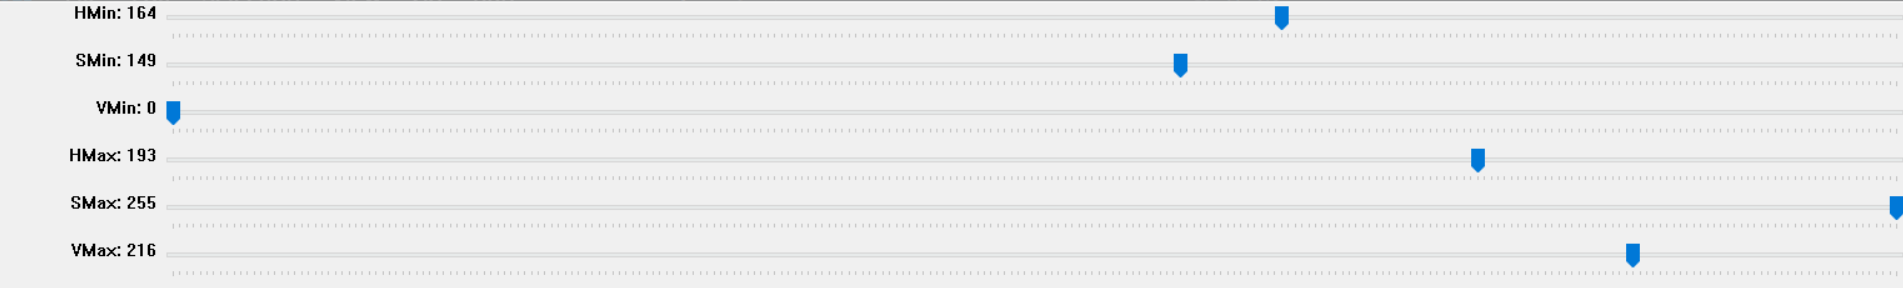

In [ ]:
get_hsv_color_ranges(hands[1])

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 4 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 26 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 58 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 75 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 81 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 84 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 85 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 83 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 79 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 82 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 101 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 110 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMax = 255)
(hMin = 111 , sMin = 0, vMin = 0), (hMax = 255 , sMax = 255, vMa

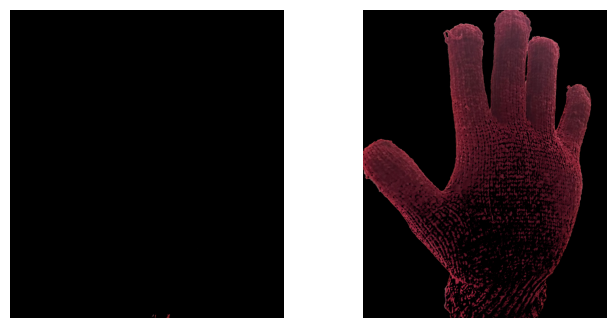

In [ ]:
lower_red = (158, 63, 32)
upper_red = (195, 217, 223)
red_ranges = (lower_red, upper_red)

# Check the mask applied to all images
red_masked = get_mask(hands, lower_red, upper_red)
show_images_h(red_masked)


Save the configuration into the json file

In [ ]:
config = {
    "colors": {
        "blue": {
            "lower": list(lower_blue),
            "upper": list(upper_blue),
        },
        "red": {
            "lower": list(lower_red),
            "upper": list(upper_red),
        }
    }
}

with open(CONFIG_PATH, "w") as f:
    json.dump(config, f, indent=4)

print(f"Color configuration saved to {CONFIG_PATH}")

Color configuration saved to ../configs\test_set_2.json


Once finished, try the mask to make it's working well enough

In [ ]:
COLOR_RANGES = config["colors"]

def main():
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)

    if not cap.isOpened():
        print("Could not access the webcam")
        return

    current_mode = "blue"
    print("Webcam opened")
    print("Controls: [b]=blue | [r]=red | [a]=all | [n]=none | [q]=quit")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        if current_mode == "blue":
            lower = np.array(COLOR_RANGES["blue"]["lower"])
            upper = np.array(COLOR_RANGES["blue"]["upper"])
            mask = cv2.inRange(hsv, lower, upper)

        elif current_mode == "red":
            lower = np.array(COLOR_RANGES["red"]["lower"])
            upper = np.array(COLOR_RANGES["red"]["upper"])
            mask = cv2.inRange(hsv, lower, upper)

        elif current_mode == "all":
            # OR-combine all available colors in the config
            mask = np.zeros(frame.shape[:2], dtype=np.uint8)

            for _, ranges in COLOR_RANGES.items():
                lower = np.array(ranges["lower"])
                upper = np.array(ranges["upper"])
                m = cv2.inRange(hsv, lower, upper)
                mask = cv2.bitwise_or(mask, m)

        else:  # none
            mask = np.zeros(frame.shape[:2], dtype=np.uint8)

        result = cv2.bitwise_and(frame, frame, mask=mask)

        cv2.putText(
            result,
            f"Mode: {current_mode.upper()}",
            (20, 40),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (0, 255, 0),
            2
        )

        cv2.imshow("Original", frame)
        cv2.imshow("Masked", result)

        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break
        elif key == ord("b"):
            current_mode = "blue"
        elif key == ord("r"):
            current_mode = "red"
        elif key == ord("a"):
            current_mode = "all"
        elif key == ord("n"):
            current_mode = "none"

    cap.release()
    cv2.destroyAllWindows()
    print("Resources released")

if __name__ == "__main__":
    main()


Webcam opened
Controls: [b]=blue | [r]=red | [a]=all | [n]=none | [q]=quit
Resources released


Finally, try Kalman tracker

In [ ]:
def build_kalman(dt=1.0, q=1e-2, r=1e-1):
    """
    4D state: [cx, cy, vx, vy]
    2D measurement: [cx, cy]
    """
    kf = cv2.KalmanFilter(4, 2)

    kf.measurementMatrix = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0]
    ], dtype=np.float32)

    kf.transitionMatrix = np.array([
        [1, 0, dt, 0],
        [0, 1, 0, dt],
        [0, 0, 1,  0],
        [0, 0, 0,  1]
    ], dtype=np.float32)

    kf.processNoiseCov = np.eye(4, dtype=np.float32) * q
    kf.measurementNoiseCov = np.eye(2, dtype=np.float32) * r
    kf.errorCovPost = np.eye(4, dtype=np.float32)

    return kf


def clean_mask(mask, ksize=5, iters=1):
    kernel = np.ones((ksize, ksize), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=iters)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=iters)
    return mask


def detect_bbox_and_center(frame_hsv, lower, upper, min_area=1500):
    """
    Returns (bbox, (cx,cy), mask) or (None, None, mask)
    bbox = (x,y,w,h)
    """
    lower = np.array(lower, dtype=np.uint8)
    upper = np.array(upper, dtype=np.uint8)

    mask = cv2.inRange(frame_hsv, lower, upper)
    mask = clean_mask(mask, ksize=7, iters=1)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None, None, mask

    cnt = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(cnt)
    if area < min_area:
        return None, None, mask

    x, y, w, h = cv2.boundingRect(cnt)
    cx = x + w / 2.0
    cy = y + h / 2.0
    return (x, y, w, h), (cx, cy), mask


def init_kalman_if_needed(kf, center, initialized_flag):
    if initialized_flag:
        return True
    cx, cy = center
    kf.statePost = np.array([[cx], [cy], [0], [0]], dtype=np.float32)
    kf.errorCovPost = np.eye(4, dtype=np.float32)
    return True


def main():
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
    if not cap.isOpened():
        print("Could not access the webcam")
        return

    # Two independent Kalman filters (one per color)
    kalmans = {
        "blue": {"kf": build_kalman(dt=1.0, q=1e-2, r=1e-1), "init": False},
        "red":  {"kf": build_kalman(dt=1.0, q=1e-2, r=1e-1), "init": False},
    }

    print("Webcam opened")
    print("Controls: [q]=quit | [m]=show masks on/off")
    show_masks = False

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Process each color independently
        for color_name in ["blue", "red"]:
            if color_name not in COLOR_RANGES:
                continue

            lower = COLOR_RANGES[color_name]["lower"]
            upper = COLOR_RANGES[color_name]["upper"]

            bbox, center, mask = detect_bbox_and_center(hsv, lower, upper, min_area=1500)

            kf = kalmans[color_name]["kf"]

            # Kalman predict 
            pred = kf.predict()
            pred_x, pred_y = float(pred[0, 0]), float(pred[1, 0])

            # If we have a detection, correct Kalman
            if center is not None:
                kalmans[color_name]["init"] = init_kalman_if_needed(kf, center, kalmans[color_name]["init"])
                meas = np.array([[center[0]], [center[1]]], dtype=np.float32)
                kf.correct(meas)

                # Draw detection bbox
                x, y, w, h = bbox
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, f"{color_name.upper()} DET", (x, y - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

                # Draw measurement point (green)
                cv2.circle(frame, (int(center[0]), int(center[1])), 5, (0, 255, 0), -1)
            else:
                cv2.putText(frame, f"{color_name.upper()} LOST", (20, 30 if color_name=="blue" else 60),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

            # Draw prediction point (red)
            cv2.circle(frame, (int(pred_x), int(pred_y)), 5, (0, 0, 255), -1)

            if show_masks:
                cv2.imshow(f"mask_{color_name}", mask)

        cv2.imshow("Kalman Multi-Color Tracking", frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break
        elif key == ord("m"):
            show_masks = not show_masks
            if not show_masks:
                cv2.destroyWindow("mask_blue")
                cv2.destroyWindow("mask_red")

    cap.release()
    cv2.destroyAllWindows()
    print("Resources released")


if __name__ == "__main__":
    main()


Webcam opened
Controls: [q]=quit | [m]=show masks on/off
Resources released


In [ ]:
import cv2
import numpy as np
import json
import math
from pathlib import Path
from collections import deque, Counter

# ---------------------------
# Config
# ---------------------------
CONFIG_PATH = Path("../configs/test_set.json")  # adjust if needed

# ---------------------------
# Helpers
# ---------------------------
def load_config(path: Path):
    with open(path, "r") as f:
        return json.load(f)

def build_kalman(dt=1.0, q=1e-2, r=1e-1):
    """
    4D state: [cx, cy, vx, vy]
    2D measurement: [cx, cy]
    """
    kf = cv2.KalmanFilter(4, 2)
    kf.measurementMatrix = np.array([[1,0,0,0],
                                     [0,1,0,0]], dtype=np.float32)
    kf.transitionMatrix = np.array([[1,0,dt,0],
                                    [0,1,0,dt],
                                    [0,0, 1,0],
                                    [0,0, 0,1]], dtype=np.float32)
    kf.processNoiseCov = np.eye(4, dtype=np.float32) * q
    kf.measurementNoiseCov = np.eye(2, dtype=np.float32) * r
    kf.errorCovPost = np.eye(4, dtype=np.float32)
    return kf

def clean_mask(mask, ksize=7, iters=1):
    kernel = np.ones((ksize, ksize), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=iters)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=iters)
    return mask

def get_color_mask(hsv, color_cfg):
    """
    Supports either:
      color: { lower:[...], upper:[...] }
    or:
      color: { ranges: [ {lower:[...], upper:[...]}, {lower:[...], upper:[...]} ] }  (useful for red)
    """
    if "ranges" in color_cfg:
        mask = np.zeros(hsv.shape[:2], dtype=np.uint8)
        for rr in color_cfg["ranges"]:
            lower = np.array(rr["lower"], dtype=np.uint8)
            upper = np.array(rr["upper"], dtype=np.uint8)
            mask_i = cv2.inRange(hsv, lower, upper)
            mask = cv2.bitwise_or(mask, mask_i)
        return mask
    else:
        lower = np.array(color_cfg["lower"], dtype=np.uint8)
        upper = np.array(color_cfg["upper"], dtype=np.uint8)
        return cv2.inRange(hsv, lower, upper)

def detect_bbox_and_center(hsv, color_cfg, min_area=1500):
    """
    Returns (bbox, center, mask_clean) or (None, None, mask_clean)
    bbox: (x, y, w, h), center: (cx, cy)
    """
    mask = get_color_mask(hsv, color_cfg)
    mask = clean_mask(mask, ksize=7, iters=1)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None, None, mask

    cnt = max(contours, key=cv2.contourArea)
    if cv2.contourArea(cnt) < min_area:
        return None, None, mask

    x, y, w, h = cv2.boundingRect(cnt)
    cx = x + w / 2.0
    cy = y + h / 2.0
    return (x, y, w, h), (cx, cy), mask

def crop_roi(frame, bbox, pad=20):
    H, W = frame.shape[:2]
    x, y, w, h = bbox
    x1 = max(0, x - pad)
    y1 = max(0, y - pad)
    x2 = min(W, x + w + pad)
    y2 = min(H, y + h + pad)
    return frame[y1:y2, x1:x2], (x1, y1)

def largest_contour(mask, min_area=800):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None
    cnt = max(contours, key=cv2.contourArea)
    return cnt if cv2.contourArea(cnt) >= min_area else None

def count_fingers(contour):
    hull_idx = cv2.convexHull(contour, returnPoints=False)
    if hull_idx is None or len(hull_idx) < 3:
        return 0

    defects = cv2.convexityDefects(contour, hull_idx)
    if defects is None:
        return 0

    gaps = 0
    for s, e, f, d in defects[:, 0]:
        start = contour[s][0]
        end   = contour[e][0]
        far   = contour[f][0]

        a = np.linalg.norm(end - start)
        b = np.linalg.norm(far - start)
        c = np.linalg.norm(end - far)
        if b * c == 0:
            continue

        # Angle at far point
        angle = math.degrees(math.acos((b*b + c*c - a*a) / (2*b*c)))
        depth = d / 256.0

        if angle < 90 and depth > 10:
            gaps += 1

    fingers = gaps + 1 if gaps > 0 else 0
    return min(fingers, 5)

def fingers_to_rps(fingers):
    if fingers <= 1:
        return "ROCK"
    elif fingers == 2:
        return "SCISSORS"
    else:
        return "PAPER"

class GestureSmoother:
    def __init__(self, n=10):
        self.buf = deque(maxlen=n)

    def update(self, gesture):
        self.buf.append(gesture)
        return Counter(self.buf).most_common(1)[0][0]

# ---------------------------
# Main
# ---------------------------
def main():
    cfg = load_config(CONFIG_PATH)
    colors = cfg["colors"]

    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
    if not cap.isOpened():
        print("Could not access the webcam")
        return

    # Track state per color
    tracks = {}
    for name in colors.keys():
        tracks[name] = {
            "kf": build_kalman(dt=1.0, q=1e-2, r=1e-1),
            "init": False,
            "last_bbox": None,
            "last_size": (120, 120),   # fallback bbox size if needed
            "smoother": GestureSmoother(n=10),
        }

    show_masks = False
    print("Running: Kalman + Color Segmentation + RPS")
    print("Keys: [m]=toggle masks | [q]=quit")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        # Process each color independently
        for color_name, color_cfg in colors.items():
            st = tracks[color_name]
            kf = st["kf"]

            # Detection (measurement)
            bbox, center, mask = detect_bbox_and_center(hsv, color_cfg, min_area=1500)

            # Kalman predict (always)
            pred = kf.predict()
            pred_cx, pred_cy = float(pred[0, 0]), float(pred[1, 0])

            # If detection exists, init/correct
            if center is not None:
                if not st["init"]:
                    kf.statePost = np.array([[center[0]], [center[1]], [0], [0]], dtype=np.float32)
                    kf.errorCovPost = np.eye(4, dtype=np.float32)
                    st["init"] = True

                meas = np.array([[center[0]], [center[1]]], dtype=np.float32)
                kf.correct(meas)

                st["last_bbox"] = bbox
                st["last_size"] = (bbox[2], bbox[3])

                # Draw bbox + measurement
                x, y, w, h = bbox
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.circle(frame, (int(center[0]), int(center[1])), 5, (0, 255, 0), -1)

                # ROI + gesture recognition
                roi, (ox, oy) = crop_roi(frame, bbox, pad=20)
                roi_hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

                roi_mask = get_color_mask(roi_hsv, color_cfg)
                roi_mask = clean_mask(roi_mask, ksize=7, iters=1)

                cnt = largest_contour(roi_mask, min_area=800)
                if cnt is not None:
                    fingers = count_fingers(cnt)
                    gesture = fingers_to_rps(fingers)
                    gesture_stable = st["smoother"].update(gesture)

                    cv2.putText(frame, f"{color_name.upper()}: {gesture_stable}",
                                (x, max(20, y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                                (255, 255, 255), 2)

            else:
                # No measurement: draw a fallback bbox around prediction if initialized
                if st["init"]:
                    w, h = st["last_size"]
                    x = int(pred_cx - w / 2)
                    y = int(pred_cy - h / 2)
                    cv2.rectangle(frame, (x, y), (x + int(w), y + int(h)), (0, 0, 255), 2)
                    cv2.putText(frame, f"{color_name.upper()}: LOST",
                                (x, max(20, y - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                                (0, 0, 255), 2)

            # Draw prediction point (red)
            if st["init"]:
                cv2.circle(frame, (int(pred_cx), int(pred_cy)), 5, (0, 0, 255), -1)

            if show_masks:
                cv2.imshow(f"mask_{color_name}", mask)

        cv2.imshow("RPS Kalman Tracker", frame)

        key = cv2.waitKey(1) & 0xFF
        if key == ord("q"):
            break
        elif key == ord("m"):
            show_masks = not show_masks
            if not show_masks:
                # close mask windows
                for color_name in colors.keys():
                    try:
                        cv2.destroyWindow(f"mask_{color_name}")
                    except cv2.error:
                        pass

    cap.release()
    cv2.destroyAllWindows()
    print("👌 Resources released")

if __name__ == "__main__":
    main()


Running: Kalman + Color Segmentation + RPS
Keys: [m]=toggle masks | [q]=quit
👌 Resources released
